In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize, signal, fftpack, ndimage

# Interpolations

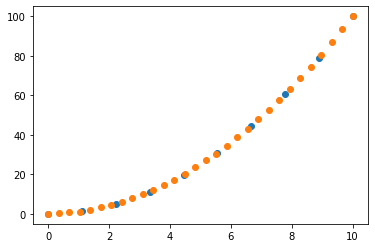

In [2]:
x = np.linspace(0, 10, 10)
y = x**2

f = interp1d(x, y, kind='linear')   # kind = linear, cubic, nearest, etc. (cf. doc)

new_x = np.linspace(0, 10, 30)
new_y = f(new_x)
plt.scatter(x, y)
plt.scatter(new_x, new_y)
plt.show()

# Optimisation
## Curve fit

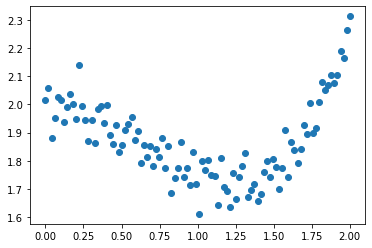

In [3]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)
plt.show()

In [4]:
def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [5]:
params, param_cov = optimize.curve_fit(f, x, y)  # Renvoie les paramètres de la fonction et la matrice de covariance


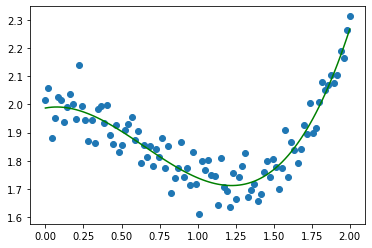

In [6]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g')

## Minimisation

In [7]:
def f(x):
    return x**2 + 15*np.sin(x)

In [8]:
mini = optimize.minimize(f, x0=-10).x

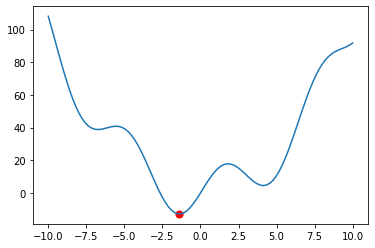

In [9]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))
plt.scatter(mini, f(mini), c='r', s=50)
plt.show()

# Traitement du signal / FFT

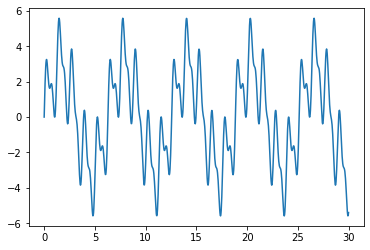

In [10]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

In [11]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
freqs = fftpack.fftfreq(y.size)

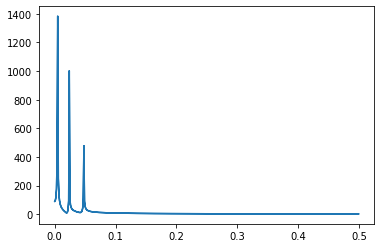

In [12]:
plt.plot(np.abs(freqs), power)

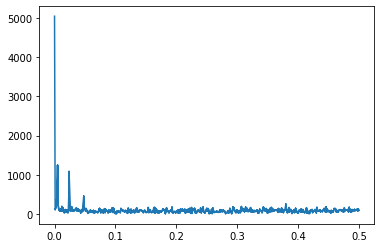

In [13]:
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
fourier = fftpack.fft(y)
power = np.abs(fourier)
freqs = fftpack.fftfreq(y.size)
plt.plot(np.abs(freqs), power)

/home/dje/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


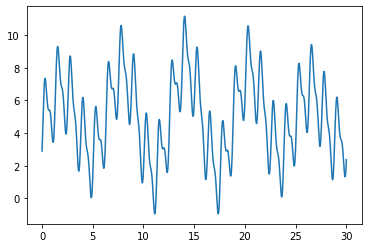

In [14]:
# Filtrage
fourier[power<400] = 0
filtered_sig = fftpack.ifft(fourier)
plt.plot(x, filtered_sig)

# Image processing

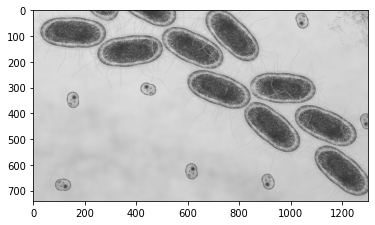

In [15]:
# On charge une image qu'on va analyser
# Ici, une photo au microscope de bactéries
image = plt.imread('bacteria.jpg')
image = image[:,:,0]
plt.imshow(image, cmap='gray')

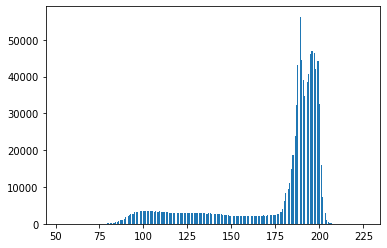

In [16]:
# On crée une copie qu'on va modifier (avec la méthode ravel)
image2 = np.copy(image)
# On affiche l'histogramme.
plt.hist(image2.ravel(), bins=255)
plt.show()

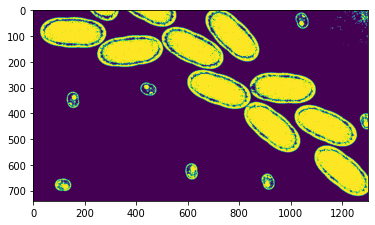

In [17]:
# On veut séparer le fond. Pour cela, on détermine le seuil à appliquer en regardant l'histogramme
# On fait du boolean indexing pour filter les pixels dont la valeur < 175
image = image < 170
# On peut afficher directement la nouvelle matrice même si elle ne contient que True/False
# On voit bien se détacher les bactéries, plus d'autres points en bas à gauche et du bruit en haut à droite
plt.imshow(image)

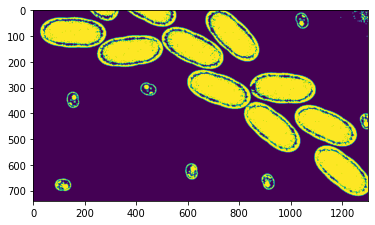

In [18]:
# On applique un peu de morphologie pour supprimer le bruit
# C'est mieux mais pas encore top
filtered_image = ndimage.binary_opening(image)
plt.imshow(filtered_image)

77


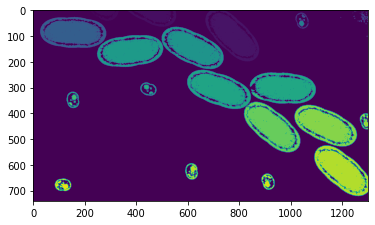

In [19]:
# On associe un label à chaque groupe de pixels contigus
# On obtient une image de labels et le nb total de labels placés
# On peut afficher directement la matrice des labels
label_image, nb_label = ndimage.label(filtered_image)
print(nb_label)
plt.imshow(label_image)

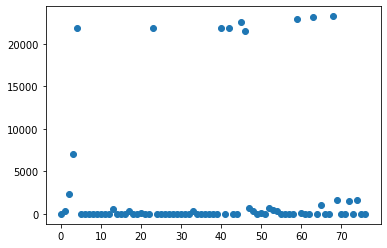

In [20]:
# On détermine la taille de chaque groupe de pixels
sizes = ndimage.sum(filtered_image, label_image, range(nb_label))
# On peut tracer ça sur un graph
# On voit clairement que certains groupes contiennent bxp de pixels (les bactéries)
plt.scatter(range(nb_label), sizes)

In [24]:
real_cells = np.asarray(range(nb_label))[sizes > 15000]
len(real_cells)

9